<a href="https://colab.research.google.com/github/areebaxijaz/AER850-Project-1/blob/main/AER850Project1_AreebaIjaz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import seaborn as sns
import warnings
from sklearn.metrics  import classification_report, confusion_matrix
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = [10,5]

In [75]:
# Ignore warnings

import warnings
# Set the warning filter to ignore FutureWarning
warnings.simplefilter(action = "ignore", category = FutureWarning)

### **DATA PRE-PROCESSING**

In [76]:
full_data = pd.read_csv('/content/Project_1_Data.csv')

**Data Shape**  
After loading the dataset, I examine its shape to get a better sense of the data and the information it contains.  

In [77]:
full_data.shape

(860, 4)

In [78]:
full_data.head()

,X,Y,Z,Step
0,9.375,3.0625,0.50,1
1,9.375,3.0625,0.51,1
2,9.375,3.0625,0.52,1
3,9.375,3.0625,0.53,1
4,9.375,3.0625,0.54,1


In [79]:
# Data Info
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 860 entries, 0 to 859
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       860 non-null    float64
 1   Y       860 non-null    float64
 2   Z       860 non-null    float64
 3   Step    860 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 27.0 KB


**Missing Data**  
From the entry totals above, there appears to be missing data.  A heatmap will help better visualize what features as missing the most information.

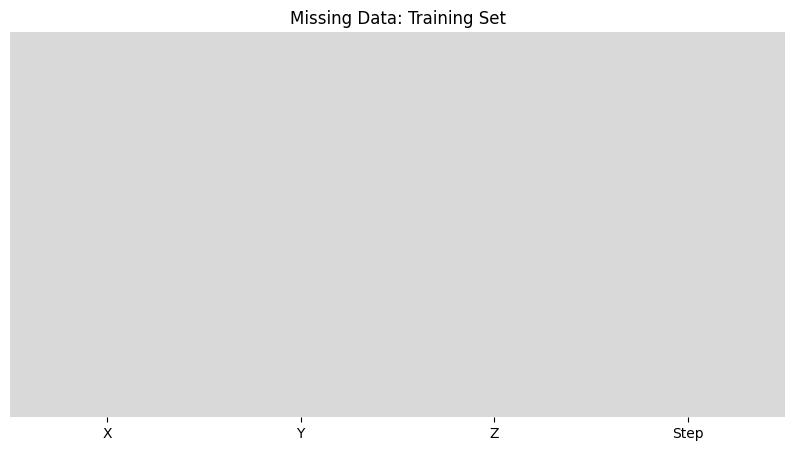

In [80]:
# Heatmap
sns.heatmap(full_data.isnull(),yticklabels = False, cbar = False,cmap = 'tab20c_r')
plt.title('Missing Data: Training Set')
plt.show()

# **Data Visualization**

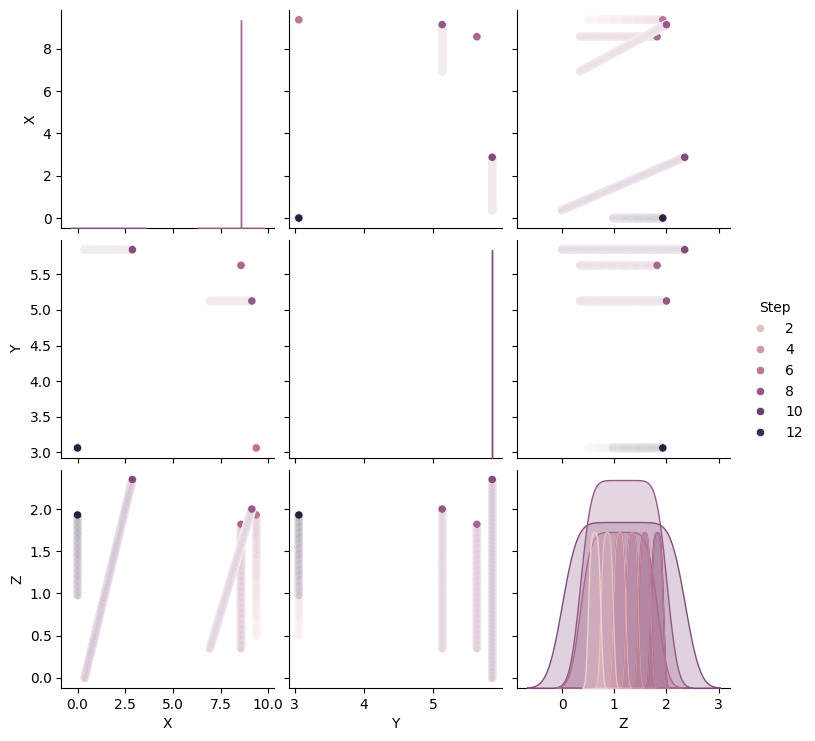

In [81]:


sns.pairplot(full_data, hue='Step')  # Assuming 'Step' is the target variable
plt.show()


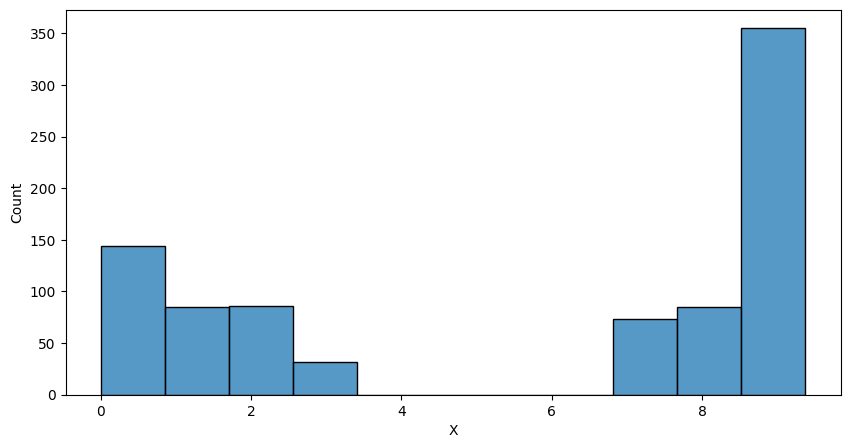

In [82]:
sns.histplot(full_data['X'],kde=False)
plt.show()

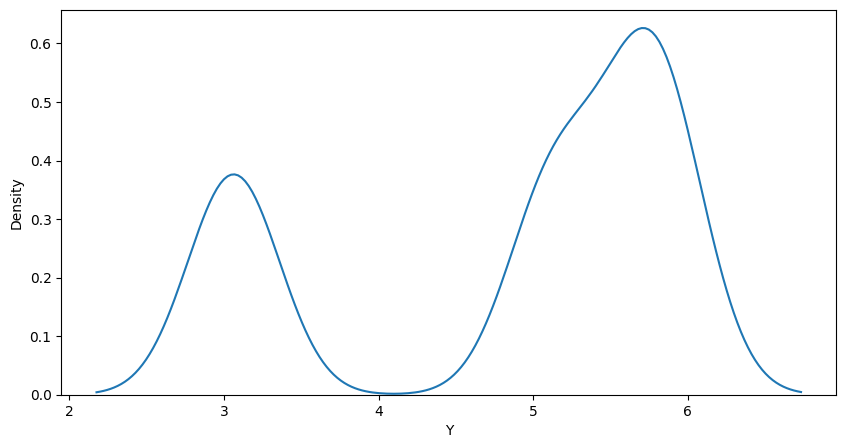

In [83]:
sns.distplot(full_data['Y'], hist=False)
plt.show()

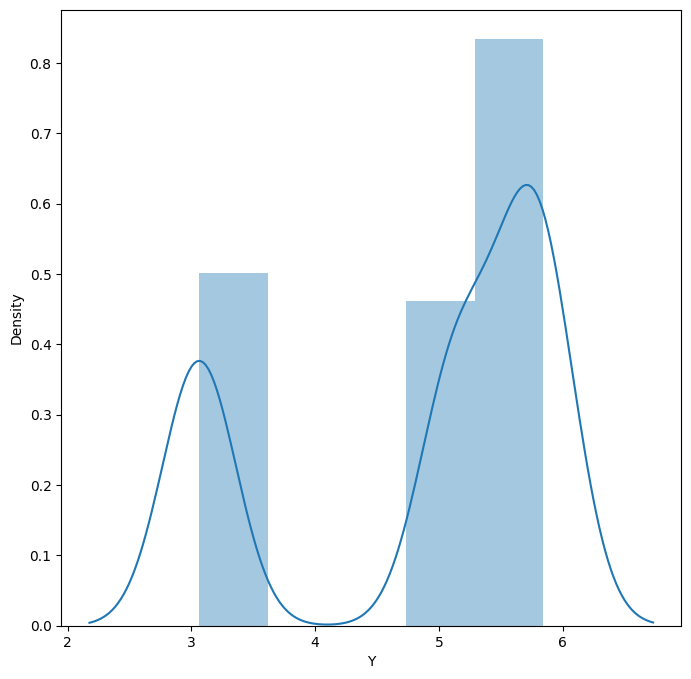

In [84]:
plt.figure(figsize=(8,8))
sns.distplot(full_data['Y'])
plt.show()

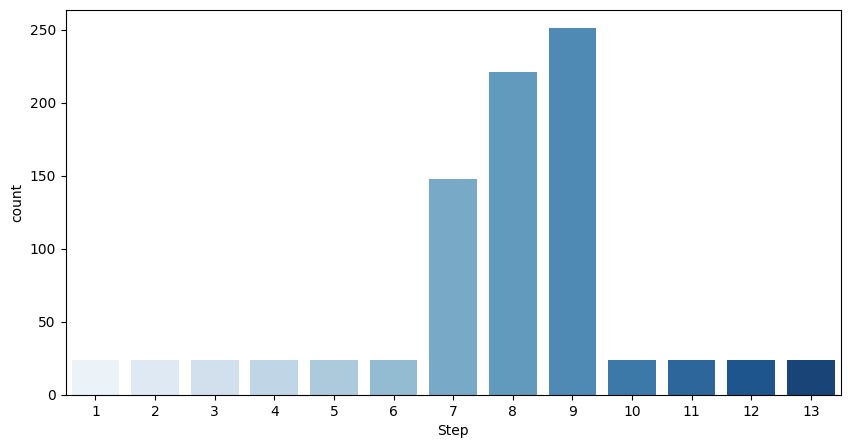

In [85]:
sns.countplot(x="Step", data=full_data, palette="Blues");
plt.show()

# **Correlation Analysis**

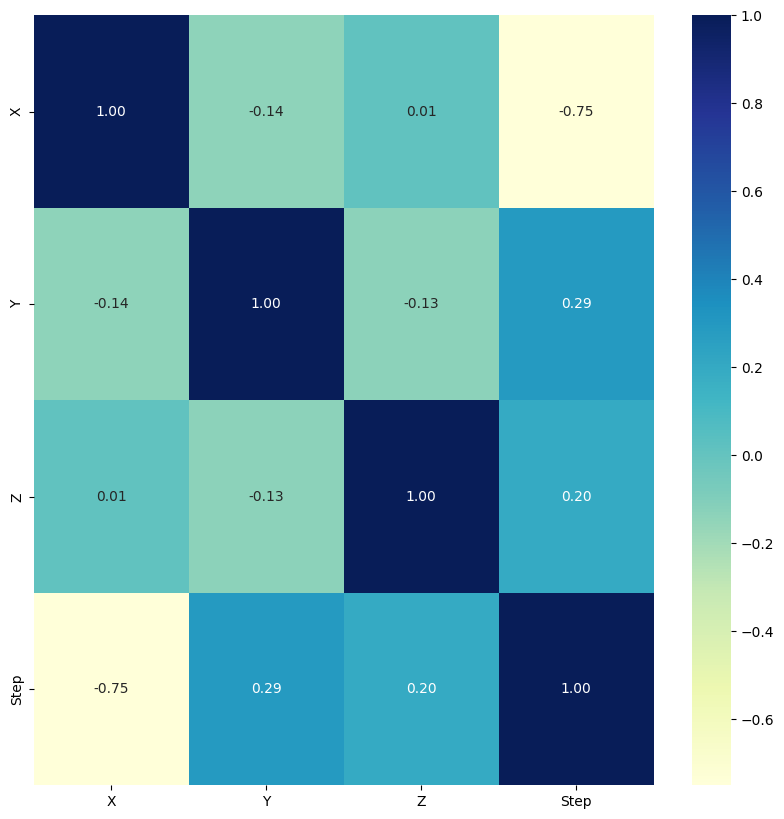

In [86]:
plt.subplots(figsize=(10, 10))
sns.heatmap(full_data.corr(), cmap = "YlGnBu", annot=True, fmt=".2f")
plt.show()

In [87]:
# Numeric summary
full_data.describe()

,X,Y,Z,Step
count,860.000000,860.000000,860.000000,860.000000
mean,5.587116,4.845605,1.197465,7.756977
std,3.719067,1.142329,0.522844,2.407837
min,0.000000,3.062500,0.000000,1.000000
25%,1.562500,3.062500,0.783800,7.000000
50%,7.770000,5.125000,1.220000,8.000000
75%,8.575000,5.845000,1.616975,9.000000
max,9.375000,5.845000,2.350000,13.000000


In [88]:
# Split data to be used in the models
# Create matrix of features
x = full_data.drop('Step', axis = 1) # grabs everything else but 'Step'

# Create target variable
y = full_data['Step'] # y is the column we're trying to predict

# Use x and y variables to split the training data into train and test set
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .20, random_state = 101)

# **1. LOGISTIC REGRESSION**

## **Model Training**

In [89]:
# Fit
# Import model
from sklearn.linear_model import LogisticRegression



# Define the Logistic Regression model
log_reg_model = LogisticRegression(solver='liblinear', random_state=42)

#  Define the hyperparameter grid
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', None],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    'max_iter': [100, 200, 300]           # Maximum number of iterations
}

# Setup GridSearchCV
lg_grid_search = GridSearchCV(estimator=log_reg_model, param_grid=param_grid,
                           scoring='accuracy', cv=5, verbose=1, n_jobs=-1)

# Fit GridSearchCV
lg_grid_search.fit(x_train, y_train)

# Best parameters found by GridSearchCV
print("Best parameters:", lg_grid_search.best_params_)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best parameters: {'C': 100, 'max_iter': 100, 'penalty': 'l1'}


Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5
           3       0.67      1.00      0.80         2
           4       1.00      0.50      0.67         4
           5       1.00      0.83      0.91         6
           6       0.88      1.00      0.93         7
           7       1.00      1.00      1.00        36
           8       0.97      1.00      0.99        35
           9       1.00      1.00      1.00        52
          10       0.83      1.00      0.91         5
          11       0.00      0.00      0.00        12
          12       0.08      1.00      0.15         1
          13       1.00      1.00      1.00         2

    accuracy                           0.91       172
   macro avg       0.80      0.87      0.80       172
weighted avg       0.91      0.91      0.90       172

Confusion Matrix:
 [[ 5  0  0  0

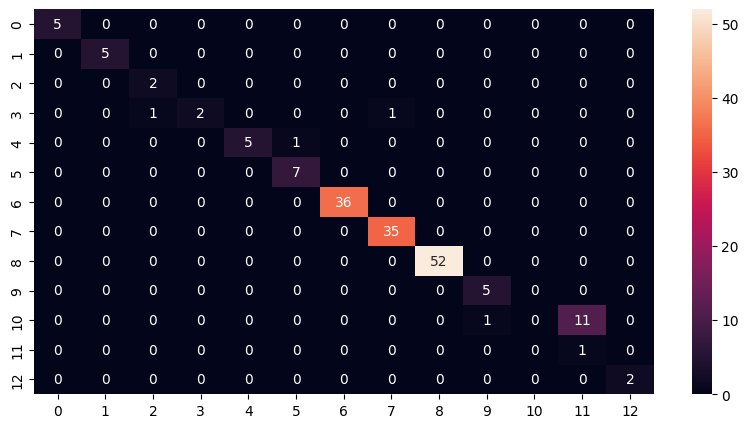

In [90]:
# Step 7: Evaluate the best model
best_model = lg_grid_search.best_estimator_
y_pred = best_model.predict(x_test)

# Print classification report
print("Classification Report for Logistic Regression:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
sns.heatmap(cm, annot=True)
plt.show()

# **2. Decision Tree**

## **Model Training**


**Hyperparameter Tuning with GridSearchCV**

In [91]:
from sklearn.tree import DecisionTreeClassifier

print('Decision Tree Classifier')
# Create instance of model


#  Define the Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)

#  Define the hyperparameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Setup GridSearchCV
dt_grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid,
                           scoring='accuracy', cv=5, verbose=1, n_jobs=-1)

# Fit GridSearchCV
dt_grid_search.fit(x_train, y_train)

# Best parameters found by GridSearchCV
print("Best parameters:", dt_grid_search.best_params_)

Decision Tree Classifier
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


**Model Evaluation with GridSearchCV**

Classification Report for Decision Tree:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         6
           6       1.00      1.00      1.00         7
           7       1.00      1.00      1.00        36
           8       1.00      1.00      1.00        35
           9       1.00      1.00      1.00        52
          10       1.00      1.00      1.00         5
          11       1.00      1.00      1.00        12
          12       1.00      1.00      1.00         1
          13       1.00      1.00      1.00         2

    accuracy                           1.00       172
   macro avg       1.00      1.00      1.00       172
weighted avg       1.00      1.00      1.00       172

Confusion Matrix:
 [[ 5  0  0  0  0  0

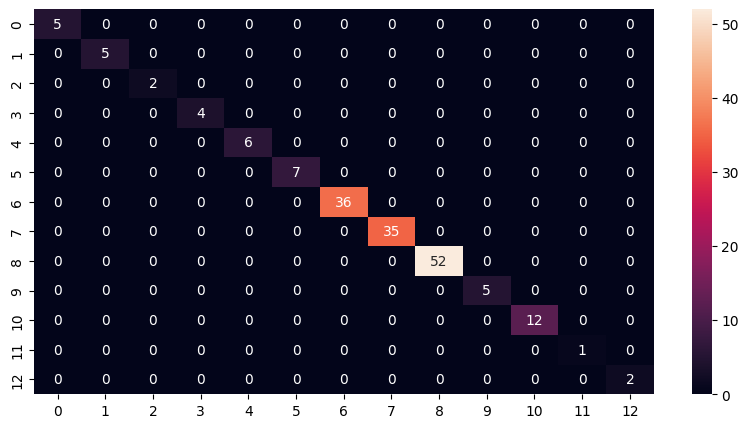

In [92]:
# Evaluate the best model
best_model = dt_grid_search.best_estimator_
y_pred = best_model.predict(x_test)

# Print classification report
print("Classification Report for Decision Tree:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
sns.heatmap(cm, annot=True)
plt.show()

# **3. Random Forest**

## **Model Training**



**Hyperparameter Tuning with GridSearchCV**

In [93]:
from sklearn.ensemble import RandomForestClassifier

print('Random Forest Classifier')
# Create instance of model

# Example for Random Forest
rf_model = RandomForestClassifier()
param_grid = {'n_estimators': [100, 200], 'max_depth': [None, 10, 20]}
grid_search = GridSearchCV(rf_model, param_grid)
grid_search.fit(x_train, y_train)
# Print the best parameters found
print("Best Parameters:", grid_search.best_params_)

Random Forest Classifier
Best Parameters: {'max_depth': None, 'n_estimators': 100}



**Model Evaluation with GridSearchCV**

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         6
           6       1.00      1.00      1.00         7
           7       1.00      1.00      1.00        36
           8       1.00      1.00      1.00        35
           9       1.00      1.00      1.00        52
          10       1.00      1.00      1.00         5
          11       1.00      1.00      1.00        12
          12       1.00      1.00      1.00         1
          13       1.00      1.00      1.00         2

    accuracy                           1.00       172
   macro avg       1.00      1.00      1.00       172
weighted avg       1.00      1.00      1.00       172

Confusion Matrix:
 [[ 5  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  5  0  0  0  

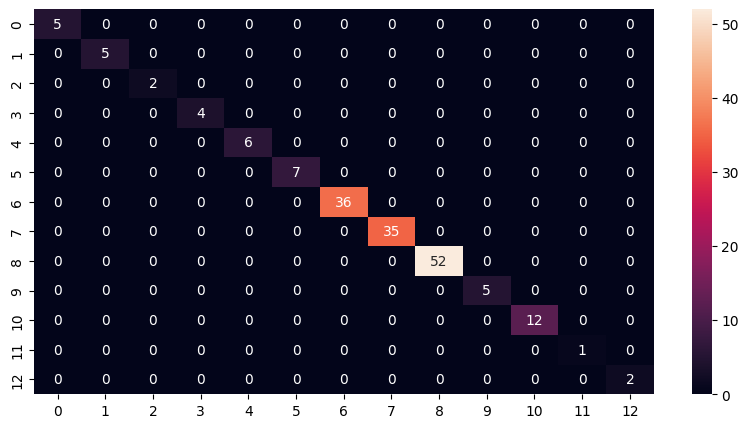

In [94]:
from sklearn.metrics import classification_report, confusion_matrix
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
# Print confusion matrix
print("Confusion Matrix:\n", cm)
sns.heatmap(cm, annot=True)
plt.show()

**Hyperparameter tuning with RandomizedSearchCV**


In [95]:
#  Split the dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#  Define the model
rf_model = RandomForestClassifier()

#  Hyperparameter tuning with RandomizedSearchCV
# Define the parameter grid
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_dist,
    n_iter=100,  # Number of different combinations to try
    cv=3,        # Cross-validation splitting strategy
    verbose=1,   # Verbosity level
    random_state=42,
    n_jobs=-1    # Use all available cores
)

# Fit the model
random_search.fit(x_train, y_train)

# Print the best parameters found
print("Best Parameters:", random_search.best_params_)



Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best Parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 30}


**Model Evaluation with RandomizedSearchCV**

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         5
           3       0.86      1.00      0.92         6
           4       0.88      0.88      0.88         8
           5       0.80      0.80      0.80         5
           6       1.00      0.75      0.86         4
           7       1.00      1.00      1.00        26
           8       1.00      1.00      1.00        43
           9       1.00      1.00      1.00        52
          10       1.00      0.67      0.80         3
          11       0.80      1.00      0.89         4
          12       0.86      1.00      0.92         6
          13       1.00      0.86      0.92         7

    accuracy                           0.97       172
   macro avg       0.94      0.92      0.92       172
weighted avg       0.97      0.97      0.97       172

Confusion Matrix:
 [[ 3  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  5  0  0  0  

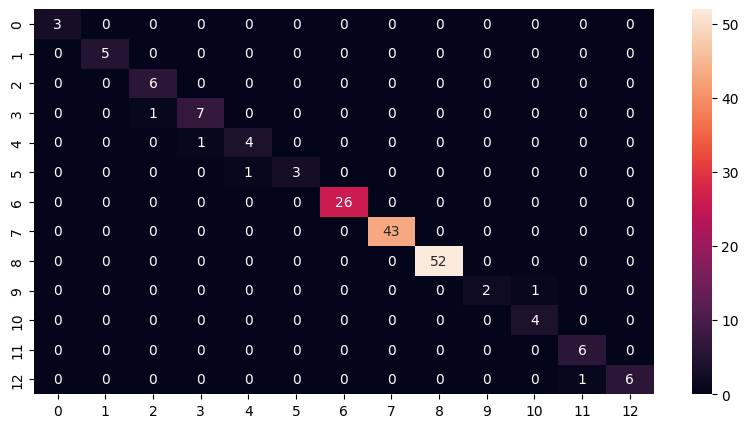

In [96]:

best_model = random_search.best_estimator_
y_pred = best_model.predict(x_test)


# Print classification report
print(classification_report(y_test, y_pred))

# Print confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
sns.heatmap(cm, annot=True)
plt.show()

##**Stacked Model Performance Analysis(Random Forest and Decision Tree)**

Classification Report for Stacked Model:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00         8
           5       0.83      1.00      0.91         5
           6       1.00      0.75      0.86         4
           7       1.00      1.00      1.00        26
           8       1.00      1.00      1.00        43
           9       1.00      1.00      1.00        52
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         4
          12       0.86      1.00      0.92         6
          13       1.00      0.86      0.92         7

    accuracy                           0.99       172
   macro avg       0.98      0.97      0.97       172
weighted avg       0.99      0.99      0.99       172

Confusion Matrix for Stacked Model:
 [

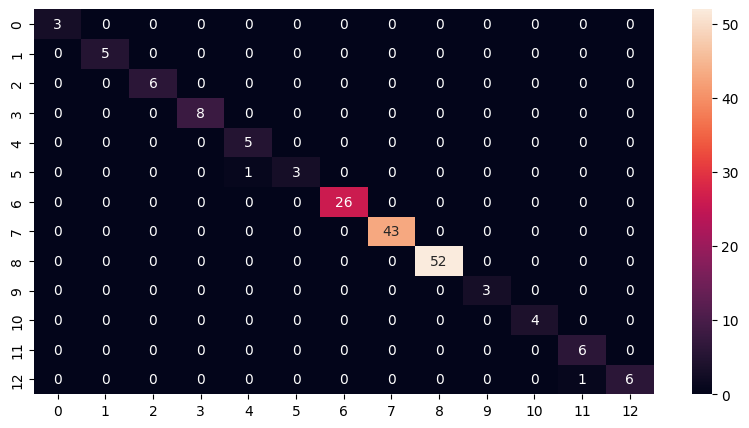

In [97]:
from sklearn.ensemble import  StackingClassifier
from sklearn.metrics import classification_report, confusion_matrix
rf_model = random_search.best_estimator_
dt_model = dt_grid_search.best_estimator_

#  Create a Stacking Classifier
stacked_model = StackingClassifier(
    estimators=[('rf', rf_model), ('dt', dt_model)]

)

# Fit the stacked model
stacked_model.fit(x_train, y_train)

#  Model Performance Analysis
# Make predictions
y_pred_stacked = stacked_model.predict(x_test)

# Print classification report for the stacked model
print("Classification Report for Stacked Model:")
print(classification_report(y_test, y_pred_stacked))

# Print confusion matrix for the stacked model
cm_stacked = confusion_matrix(y_test, y_pred_stacked)
print("Confusion Matrix for Stacked Model:\n", cm_stacked)
sns.heatmap(cm_stacked, annot=True)
plt.show()

##**Save the Stacked Model**

In [98]:
import joblib

joblib.dump(stacked_model, 'stacked_model.joblib')

['stacked_model.joblib']

##**Prediction of Maintenance Steps**

In [99]:
model = joblib.load('stacked_model.joblib')
new_coordinates = [[9.375, 3.0625, 1.51], [6.995, 5.125, 0.3875], [0, 3.0625, 1.93], [9.4, 3, 1.8], [9.4, 3, 1.3]]
predictions = model.predict(new_coordinates)
print(predictions)

[ 5  8 13  6  4]
